In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.api import qqplot

In [3]:
data = pd.read_csv("sunspots.csv")
data.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del data["YEAR"]

In [4]:
data.head(10)

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
1705-12-31,58.0
1706-12-31,29.0
1707-12-31,20.0
1708-12-31,10.0
1709-12-31,8.0


In [5]:
data.describe()

,SUNACTIVITY
count,309.000000
mean,49.752104
std,40.452595
min,0.000000
25%,16.000000
50%,40.000000
75%,69.800000
max,190.200000


In [6]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [7]:
data

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


<Axes: >

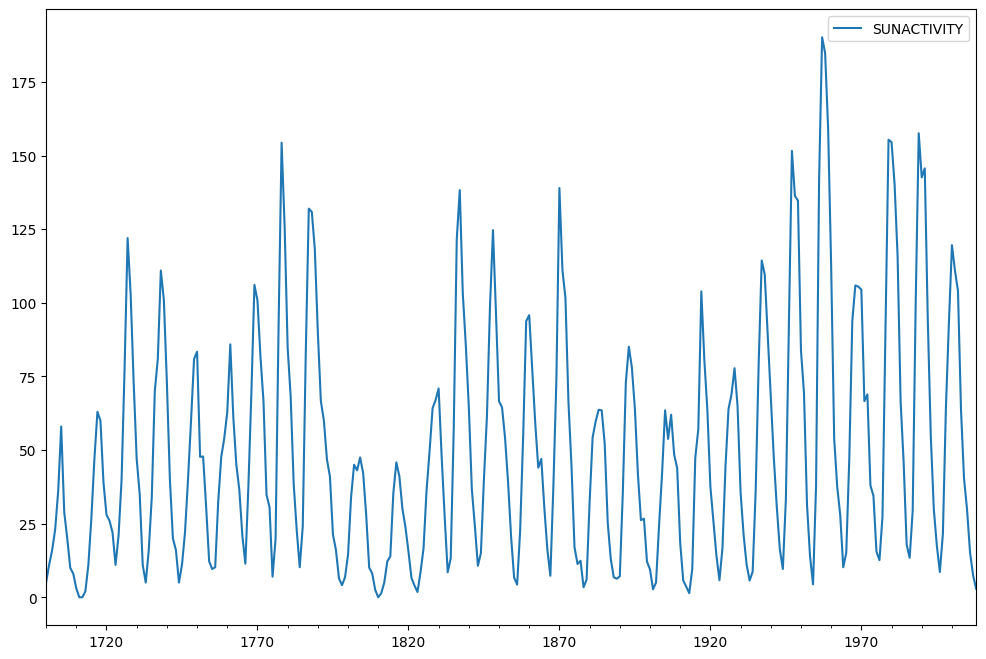

In [8]:
data.plot(figsize=(12, 8))

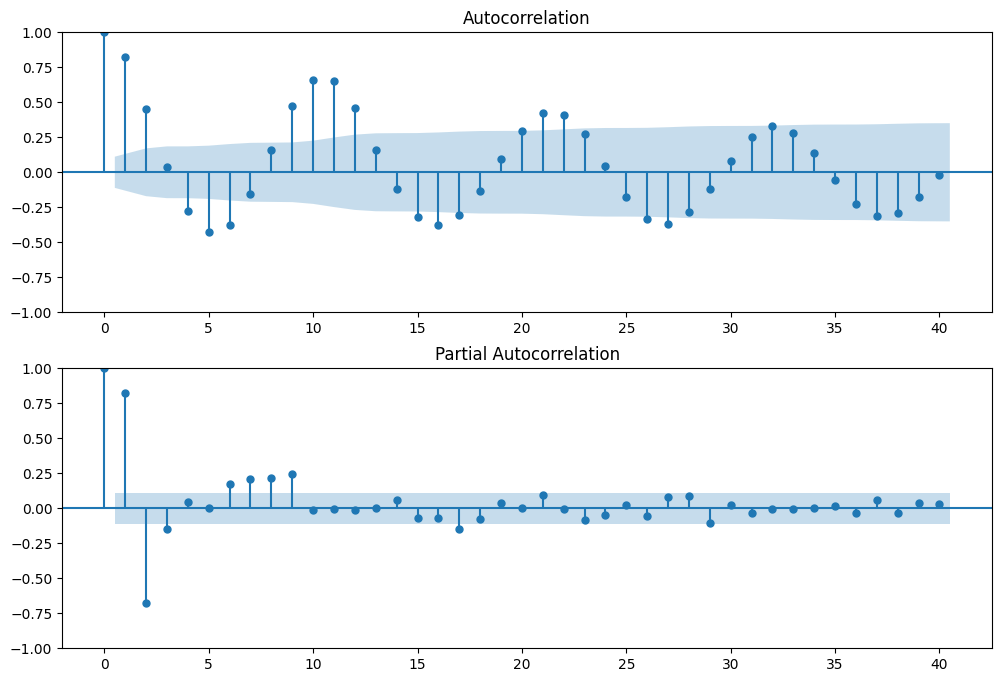

In [9]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

## Model the data:

In [42]:
sarima_mod = SARIMAX(data, order=(2, 0, 0), seasonal_order=(1, 0, 1, 60)).fit()
print(sarima_mod.summary())

c:\Users\Sai Anish\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Sai Anish\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\Sai Anish\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                      SARIMAX Results                                       
Dep. Variable:                          SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(2, 0, 0)x(1, 0, [1], 60)   Log Likelihood               -1340.249
Date:                              Sun, 15 Oct 2023   AIC                           2690.499
Time:                                      19:48:19   BIC                           2709.166
Sample:                                  12-31-1700   HQIC                          2697.962
                                       - 12-31-2008                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4304      0.039     36.910      0.000       1.354       1.506
ar.L2         -0.58

In [43]:
print(sarima_mod.aic, sarima_mod.bic, sarima_mod.hqic)

2690.4989647057637 2709.1656710902525 2697.961949512321


In [44]:
sm.stats.durbin_watson(sarima_mod.resid.values)

1.9301280344877916

## Plotting the Data


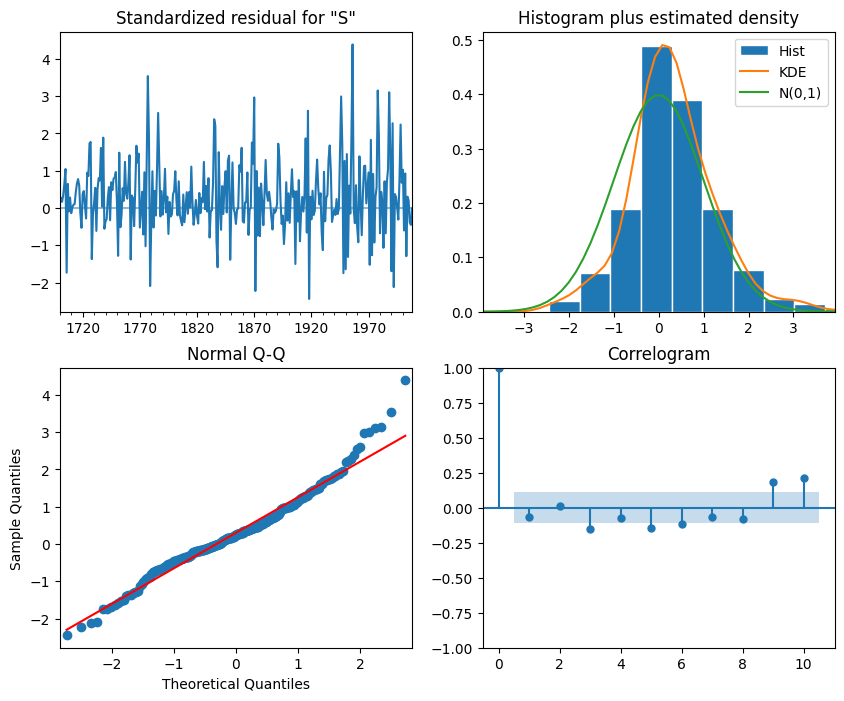

In [45]:
sarima_mod.plot_diagnostics(figsize=(10, 8))
plt.show()

In [46]:
predict_sunspots_sarima = sarima_mod.predict('1990', '2012', dynamic=False)
print(predict_sunspots_sarima)

1990-12-31    173.058677
1991-12-31    104.749871
1992-12-31    132.443435
1993-12-31     47.869965
1994-12-31     24.552203
1995-12-31     17.322893
1996-12-31     14.160147
1997-12-31      7.825056
1998-12-31     24.057333
1999-12-31     81.112568
2000-12-31    101.152904
2001-12-31    121.794548
2002-12-31     87.379126
2003-12-31     86.794488
2004-12-31     34.952064
2005-12-31     26.109392
2006-12-31     22.117467
2007-12-31     15.586321
2008-12-31      3.080370
2009-12-31      7.706976
2010-12-31      6.161134
2011-12-31      9.153903
2012-12-31     11.516161
Freq: A-DEC, Name: predicted_mean, dtype: float64


(-20.0, 38.0, -4.0, 200.0)

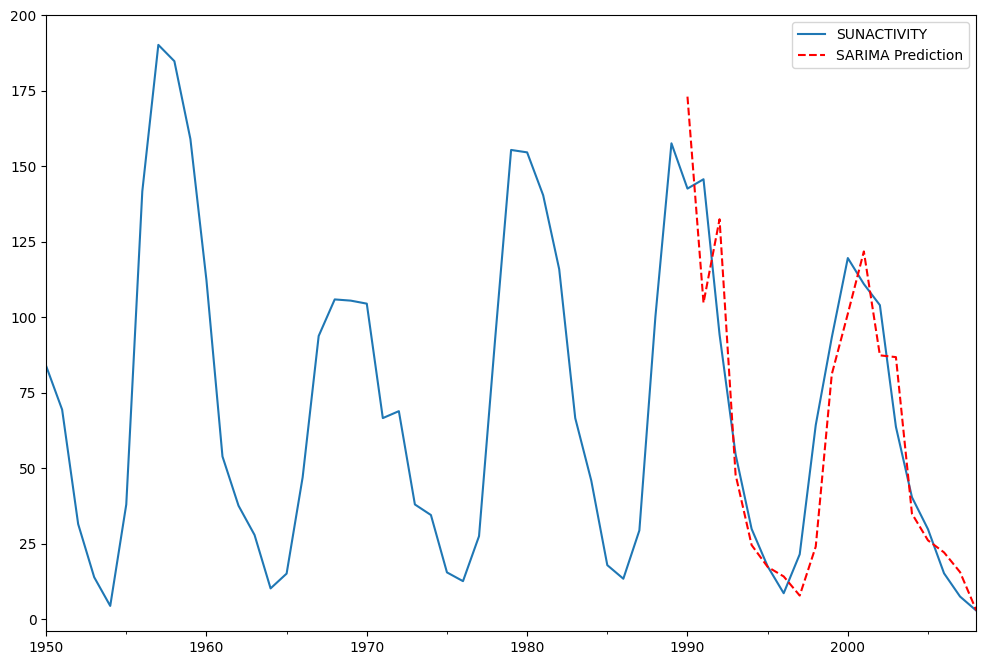

In [47]:
ax = data.loc['1950':].plot(figsize=(12, 8))
ax = predict_sunspots_sarima.plot(ax=ax, style='r--', label='SARIMA Prediction')
ax.legend()
ax.axis((-20.0, 38.0, -4.0, 200.0))

## Calculate Forecast Errors

In [48]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))

In [49]:
print("MFE = ", mean_forecast_err(data.SUNACTIVITY, predict_sunspots_sarima))
print("MAE = ", mean_absolute_err(data.SUNACTIVITY, predict_sunspots_sarima))

MFE =  2.120061603782982
MAE =  0.13131963138638678
